In [1]:
%matplotlib inline
import numpy as N
import matplotlib.pyplot as P
import time
import os
import matplotlib.cm as cm
from prefig import *
from scipy.stats import kde
import matplotlib.colors as mcolors
from scipy.stats import mode
from scipy.interpolate import interp2d
from astropy.table import Table, Column, MaskedColumn

In [2]:
d = Table.read('BPT2_rjsmethurst.fit', format='fits')

In [3]:
u, idx =  N.unique(d['dr7objid'], return_index=True)
dat = d[idx]
dat

dr7objid,ra1,dec1,objid,distance,ra2,dec2,oiii_5007_flux,oiii_5007_flux_err,oiii_5007_cont,oiii_5007_cont_err,h_beta_flux,h_beta_flux_err,h_beta_cont,h_beta_cont_err,nii_6584_flux,nii_6584_flux_err,nii_6584_cont,nii_6584_cont_err,h_alpha_flux,h_alpha_flux_err,h_alpha_cont,h_alpha_cont_err,sii_6717_flux,sii_6717_flux_err,sii_6717_cont,sii_6717_cont_err,sii_6731_flux,sii_6731_flux_err,sii_6731_cont,sii_6731_cont_err,oi_6300_flux,oi_6300_flux_err,oi_6300_cont,oi_6300_cont_err
int64,float32,float32,int64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
587722981741428877,183.029,-1.07271,1237648702966333581,0.000383316205016,183.028626368,-1.07271147736,172.928,5.29688,14.141,0.684137,175.599,2.89104,13.698,0.90007,363.675,4.03917,14.1979,4.47265,807.841,5.49891,14.1922,10.0325,184.9,3.06794,14.044,5.16869,138.48,2.65535,14.034,5.18082,50.3528,2.10693,13.8259,0.455092
587722981741559888,183.438,-1.23841,1237648702966464577,0.000842979328576,183.438108663,-1.23841758168,0.602191,1.77644,11.1488,0.940003,1.48403,1.49518,11.3006,0.712656,1.38571,2.05371,12.9484,0.738859,3.57301,1.31015,12.92,0.674079,254.938,157.661,12.8127,0.911555,21.9665,7.96126,12.8137,0.897774,-2.49088,1.13175,12.2825,0.574335
587722981741625481,183.474,-1.23143,1237648702966530213,0.000792605094846,183.473985817,-1.23142963416,19.3625,1.88348,17.4803,0.660447,89.4553,2.18223,17.349,0.653259,130.038,2.07972,16.9172,0.349328,329.161,3.14163,16.9327,0.338739,54.1643,1.83951,16.8,0.668952,42.6707,2.11378,16.7733,0.688471,6.75421,1.38,16.9289,0.623281
587722981741625545,183.567,-1.13589,1237648702966530271,0.000813875086475,183.566819734,-1.13588105522,10.1099,2.80519,18.443,0.781858,12.1356,3.01247,18.781,0.934227,26.7243,5.13573,22.0779,1.39734,51.4064,3.25641,22.0393,1.3575,2.84733,2.41744,21.4943,0.883164,4.12805,3.04732,21.4696,0.846852,2.36864,2.20657,20.9564,0.586893
587722981742084303,184.567,-1.09646,1237648702966989051,0.000200536740966,184.566570895,-1.0964579644,10.8751,3.10236,18.4437,0.910465,-0.230701,1.75349,18.5886,0.960348,7.42983,3.49491,20.2164,0.844235,6.88797,3.18142,20.2161,0.858022,0.747699,2.48018,19.6251,0.510143,-0.158945,2.47795,19.5872,0.601239,-0.898094,2.55667,19.488,0.675023
587722981742936247,186.542,-1.15646,1237648702967840928,0.000683056484233,186.541909995,-1.15646847298,24.6814,1.93327,8.91978,0.800409,42.6509,1.96064,8.82439,0.746984,68.1456,2.21955,8.44694,0.756223,149.427,2.86067,8.42426,0.750913,36.0789,1.83571,8.57647,0.504775,24.4055,1.77574,8.57223,0.425007,-284967.0,430434.0,8.62269,0.724292
587722981743067266,186.762,-1.20676,1237648702967971957,0.000150510774648,186.762223423,-1.20675835312,62.668,3.4258,16.5098,0.938669,64.5959,3.2501,16.3636,0.958926,148.96,3.6941,19.5807,4.56286,286.035,4.68591,19.5848,4.5436,86.8145,3.4779,19.1956,1.99054,57.1978,3.18312,19.1678,2.02886,26.6295,2.90556,18.8877,0.853489
587722981743198320,187.082,-1.12767,1237648702968103032,0.000150922291927,187.082457117,-1.12767179598,137.857,8.35058,17.3841,1.20224,73.1883,3.25315,16.7298,0.823166,265.606,4.86128,17.7171,3.06017,377.047,5.43748,17.7254,3.04416,62.3039,3.24119,17.4497,0.96926,47.1745,3.0222,17.4114,0.901985,17.2398,2.59053,17.3669,0.752731
587722981743198327,187.086,-1.06759,1237648702968103043,0.000136111646171,187.086351723,-1.06759491346,12.2371,2.68275,12.7424,0.928697,63.4453,2.88363,12.6572,0.749682,178.168,3.27861,14.9218,2.77201,368.666,4.50806,14.9075,2.74163,43.5908,2.81758,15.0196,1.28052,41.6248,3.04116,15.0233,1.31759,6.36809,2.09282,14.5016,0.590774


In [4]:
dat['oiii_5007_flux']/dat['oiii_5007_cont']

12.2288
0.0540139
1.10768
0.548168
0.589636
2.76704
3.79582
7.93008
0.96035
1.94398
0.941688


In [5]:
snr_oiii = MaskedColumn(name='snr oiii', data=dat['oiii_5007_flux']/dat['oiii_5007_cont'], dtype=float)
snr_hbeta = MaskedColumn(name='snr h beta', data=dat['h_beta_flux']/dat['h_beta_cont'], dtype=float)
snr_nii = MaskedColumn(name='snr nii', data=dat['nii_6584_flux']/dat['nii_6584_cont'], dtype=float)
snr_halpha = MaskedColumn(name='snr h alpha', data=dat['h_alpha_flux']/dat['h_alpha_cont'], dtype=float)
snr_sii = MaskedColumn(name='snr sii', data=dat['sii_6717_flux']/dat['sii_6717_cont'], dtype=float)
snr_sii_6731 = MaskedColumn(name='snr sii 6731', data=dat['sii_6731_flux']/dat['sii_6731_cont'], dtype=float)
snr_oi = MaskedColumn(name='snr oi', data=dat['oi_6300_flux']/dat['oi_6300_cont'], dtype=float)

dat.add_columns([snr_oiii, snr_hbeta, snr_nii, snr_halpha, snr_sii, snr_sii_6731, snr_oi])



In [6]:
da = dat[N.where(dat['snr oiii']>3)[0]]
d = da[N.where(da['snr nii']>3)[0]]
ds = d[N.where(d['snr sii']>3)[0]]
dta = ds[N.where(ds['snr h alpha']>3)[0]]
dat = dta[N.where(dta['snr h beta']>3)[0]]
da = dat[N.where(dat['snr sii 6731']>3)[0]]
len(da)
#da.write('SNR_BPT_ident_galaxies_GZ2.fits', format='fits')

14764

In [7]:
x = N.linspace(-2,0, 20)
x1 = N.linspace(-2,0.4, 20)
x2 = N.linspace(-2, 0.1, 20)
x3 = N.linspace(-2.5, -0.75, 20)
y = (0.61/(x-0.05)) + 1.3
y1 = (0.61/(x1-0.47))+1.19
y2 = (0.72/(x2 -0.32))+1.3
y3 = (0.73/(x3+0.59))+1.33
sx1 = N.linspace(-0.3, 1, 20)
sy1 = 1.89*sx1 + 0.76
sx2 = N.linspace(-1.1, 0, 20)
sy2 = 1.18*sx2 + 1.30


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: RuntimeWarning: invalid value encountered in log10


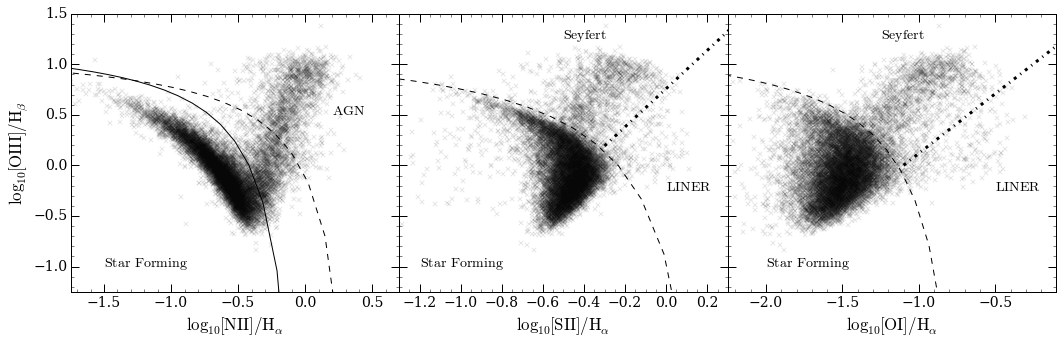

In [8]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')


P.figure(figsize=(15,5))
ax1=P.subplot(131)
ax1.scatter(N.log10(da['nii_6584_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha =0.1, marker='x', color='k')
ax1.plot(x, y, c='k', linestyle='solid')
ax1.plot(x1, y1, c='k', linestyle='dashed')
ax1.set_xlim(-1.75,0.7)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.5, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(0.45, 0.5, r'$\rm{AGN}$', ha='right')
ax1.set_ylabel(r'$\rm{log}_{10}[OIII]/H_{\beta}$')
ax1.set_xlabel(r'$\rm{log}_{10}[NII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax1=P.subplot(132)
ax1.scatter(N.log10((da['sii_6717_flux']+da['sii_6731_flux'])/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.plot(x2, y2, c='k', linestyle='dashed')
ax1.plot(sx1, sy1, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-1.3,0.3)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.2, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.set_xlabel(r'$\rm{log}_{10}[SII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('y', labelleft='off')
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax1.text(-0.5, 1.25, r'$\rm{Seyfert}$')
ax1.text(0.0, -0.25, r'$\rm{LINER}$')
ax1=P.subplot(133)
ax1.scatter(N.log10(da['oi_6300_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.plot(x3, y3, c='k', linestyle='dashed')
ax1.plot(sx2, sy2, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-2.25,-0.1)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-2.0, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(-1.25, 1.25, r'$\rm{Seyfert}$')
ax1.text(-0.5, -0.25, r'$\rm{LINER}$')
ax1.set_xlabel(r'$\rm{log}_{10}[OI]/H_{\alpha}$')
ax1.tick_params('y', labelleft='off')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.subplots_adjust(wspace=0.0)
P.savefig('GZ2_GALEX_sample_bpt_diagram_SNR_gtr_3.png', facecolor='None', edgecolor='None')

In [9]:
agn2_1 = da[N.where(0.73/(N.log10(da['oi_6300_flux']/da['h_alpha_flux'])+0.59) + 1.33 < N.log10(da['oiii_5007_flux']/da['h_beta_flux']))]
agn2_2 = agn2_1[N.where(0.61/(N.log10(agn2_1['nii_6584_flux']/agn2_1['h_alpha_flux'])-0.47) + 1.19 < N.log10(agn2_1['oiii_5007_flux']/agn2_1['h_beta_flux']))]
agn2 = agn2_2[N.where(0.72/(N.log10((agn2_2['sii_6717_flux']+agn2_2['sii_6731_flux'])/agn2_2['h_alpha_flux'])-0.32) + 1.33 < N.log10(agn2_2['oiii_5007_flux']/agn2_2['h_beta_flux']))]
print len(agn2)/float(len(da))

0.0902871850447


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:40: RuntimeWarning: invalid value encountered in log10


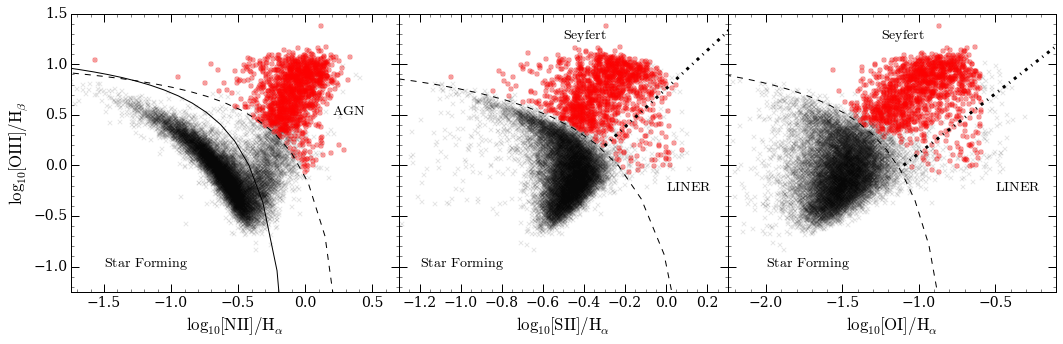

In [12]:
from prefig import Prefig
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')

#Prefig(size=(20,6.66), axcol='w', fontcol='w')
P.figure(figsize=(15,5))
ax1=P.subplot(131)
ax1.scatter(N.log10(da['nii_6584_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha =0.1, marker='x', color='k')
ax1.scatter(N.log10(agn2['nii_6584_flux']/agn2['h_alpha_flux']), N.log10(agn2['oiii_5007_flux']/agn2['h_beta_flux']), marker='o', color='r', alpha=0.3)
ax1.plot(x, y, c='k', linestyle='solid')
ax1.plot(x1, y1, c='k', linestyle='dashed')
ax1.set_xlim(-1.75,0.7)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.5, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(0.45, 0.5, r'$\rm{AGN}$', ha='right')
ax1.set_ylabel(r'$\rm{log}_{10}[OIII]/H_{\beta}$')
ax1.set_xlabel(r'$\rm{log}_{10}[NII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax1=P.subplot(132)
ax1.scatter(N.log10((da['sii_6717_flux']+da['sii_6731_flux'])/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.scatter(N.log10((agn2['sii_6717_flux']+agn2['sii_6731_flux'])/agn2['h_alpha_flux']), N.log10(agn2['oiii_5007_flux']/agn2['h_beta_flux']), marker='o', color='r', alpha=0.3)
ax1.plot(x2, y2, c='k', linestyle='dashed')
ax1.plot(sx1, sy1, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-1.3,0.3)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.2, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.set_xlabel(r'$\rm{log}_{10}[SII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('y', labelleft='off')
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax1.text(-0.5, 1.25, r'$\rm{Seyfert}$')
ax1.text(0.0, -0.25, r'$\rm{LINER}$')
ax1=P.subplot(133)
ax1.scatter(N.log10(da['oi_6300_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.scatter(N.log10(agn2['oi_6300_flux']/agn2['h_alpha_flux']), N.log10(agn2['oiii_5007_flux']/agn2['h_beta_flux']), marker='o', color='r', alpha=0.3)
ax1.plot(x3, y3, c='k', linestyle='dashed')
ax1.plot(sx2, sy2, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-2.25,-0.1)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-2.0, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(-1.25, 1.25, r'$\rm{Seyfert}$')
ax1.text(-0.5, -0.25, r'$\rm{LINER}$')
ax1.set_xlabel(r'$\rm{log}_{10}[OI]/H_{\alpha}$')
ax1.tick_params('y', labelleft='off')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.subplots_adjust(wspace=0.0)
P.savefig('GZ2_GALEX_sample_bpt_diagram_SNR_gtr_3_red_agn.png', facecolor='None', edgecolor='None')

In [172]:
sf = da[N.where(0.73/(N.log10(da['oi_6300_flux']/da['h_alpha_flux'])+0.59) + 1.33 > N.log10(da['oiii_5007_flux']/da['h_beta_flux']))]

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


In [173]:
sey = agn2[N.where(1.18*N.log10(agn2['oi_6300_flux']/agn2['h_alpha_flux']) + 1.3 < N.log10(agn2['oiii_5007_flux']/agn2['h_beta_flux']))]
liner = agn2[N.where(1.18*N.log10(agn2['oi_6300_flux']/agn2['h_alpha_flux']) + 1.3 > N.log10(agn2['oiii_5007_flux']/agn2['h_beta_flux']))]
print len(sey), len(liner)

1275 58


In [257]:
agn2.write('bpt_identified_type2_agn_hard_cuts.fits', format='fits')

In [174]:
bpt = Table.read('bpt_identified_type2_agn_hard_cuts_GZ2_GALEX_match.fits', format='fits')

In [175]:
log_m_l = N.zeros(len(bpt))
m_msun = N.zeros_like(log_m_l)

for j in range(len(log_m_l)):
    if bpt['MU_MR'][j] <=2.1:
        log_m_l[j] = -0.95 + 0.56 * bpt["MU_MR"][j]
    else:
        log_m_l[j] = -0.16 + 0.18 * bpt["MU_MR"][j]
    m_msun[j] = (((4.62 - bpt["MR"][j])/2.5) + log_m_l[j])

163
483
651


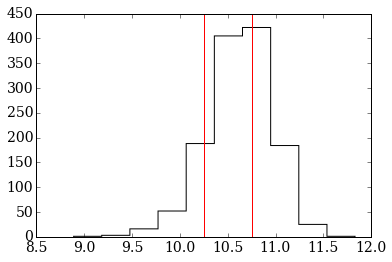

In [176]:
P.hist(m_msun, color='k', histtype='step')
P.axvline(10.25, c='r')
P.axvline(10.75, c='r')

print len(m_msun[N.where(m_msun < 10.25)])
print len(m_msun[N.where(m_msun > 10.75)])
print len(m_msun) - 163 - 483

In [177]:
h = np.load('/Users/becky/Projects/followup_gv/oh_sample/galaxy_data_extra_agn_oh_sample_match_header.npy')

In [178]:
X, Y = np.mgrid[0:4:100j, -2:5:100j]
pos = np.vstack([X.ravel(), Y.ravel()])
density = kde.gaussian_kde(np.vstack([h[:,334].astype(float), h[:,336].astype(float)]))
kernel = np.reshape(density(pos).T, X.shape)

In [179]:
density_agn = kde.gaussian_kde(np.vstack([bpt['MU_MR'], bpt['NUV_U']]))
kernel_agn = np.reshape(density_agn(pos).T, X.shape)

In [180]:
X2, Y2 = np.mgrid[-24:-17:100j, 0:4:100j]
pos2 = np.vstack([X2.ravel(), Y2.ravel()])
density2 = kde.gaussian_kde(np.vstack([h[:,296].astype(float), h[:,334].astype(float)]))
kernel2 = np.reshape(density2(pos2).T, X2.shape)

In [181]:
density_agn2 = kde.gaussian_kde(np.vstack([bpt['MR'], bpt['MU_MR']]))
kernel_agn2 = np.reshape(density_agn2(pos2).T, X2.shape)

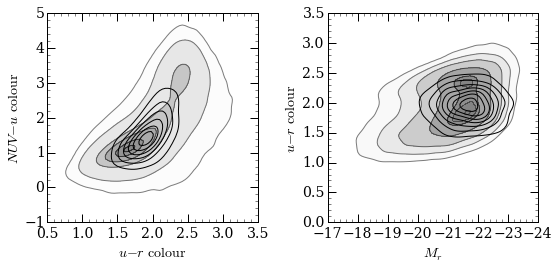

In [182]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')

P.figure(figsize=(8,4))
ax1 = P.subplot(121)
ax1.contour(X,Y, kernel_agn, colors='k')
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8], alpha=0.5)
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9], alpha=0.5)
ax1.set_xlabel(r'$u-r$ $\rm{colour}$', fontsize=14)
ax1.set_ylabel(r'$NUV -u$ $\rm{colour}$', fontsize=14)
ax1.set_ylim(-1,5)
ax1.set_xlim(0.5, 3.5)
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax2 = P.subplot(122)
ax2.contour(X2,Y2, kernel2, colors='k', levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.34], alpha=0.5)
ax2.contourf(X2,Y2, kernel2, cmap=P.cm.binary, levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.32, 0.35], alpha=0.5)
ax2.contour(X2,Y2, kernel_agn2, colors='k')
ax2.set_xlabel(r'$M_r$', fontsize=14)
ax2.set_ylabel(r'$u-r$ $\rm{colour}$', fontsize=14)
ax2.set_ylim(0.0, 3.5)
ax2.set_xlim(-17, -24)
ax2.minorticks_on()
ax2.tick_params('both', which='major', length=8, width=1)
ax2.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('colour_colour_mag_comparison_agn_type2_inactive.png', facecolor='None', edgecolor='None')

In [183]:
disc = bpt[N.where(bpt['t01_smooth_or_features_a02_features_or_disk_debiased']>0.5)]
smooth = bpt[N.where(bpt['t01_smooth_or_features_a01_smooth_debiased']>0.5)]

In [184]:
density_agn_d = kde.gaussian_kde(np.vstack([disc['MU_MR'], disc['NUV_U']]))
kernel_agn_d = np.reshape(density_agn_d(pos).T, X.shape)
density_agn_s = kde.gaussian_kde(np.vstack([smooth['MU_MR'], smooth['NUV_U']]))
kernel_agn_s = np.reshape(density_agn_s(pos).T, X.shape)

density_agn2_d = kde.gaussian_kde(np.vstack([disc['MR'], disc['MU_MR']]))
kernel_agn2_d = np.reshape(density_agn2_d(pos2).T, X2.shape)

density_agn2_s = kde.gaussian_kde(np.vstack([smooth['MR'], smooth['MU_MR']]))
kernel_agn2_s = np.reshape(density_agn2_s(pos2).T, X2.shape)


In [187]:
Mr = N.linspace(-24, -16, 50)
C_dash = 2.06 - 0.244*N.tanh((Mr + 20.07)/1.09)
lower = C_dash - 0.128
upper = C_dash + 0.128

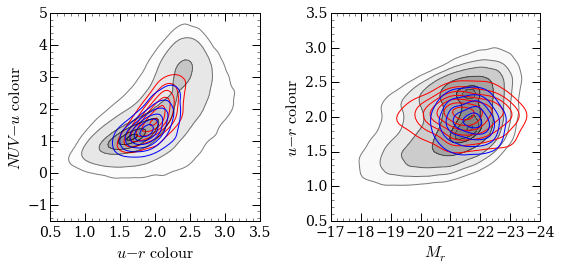

In [189]:
P.figure(figsize=(8,4))
ax1 = P.subplot(121)
ax1.contour(X,Y, kernel_agn_s, colors='r')
ax1.contour(X,Y, kernel_agn_d, colors='b')
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8], alpha=0.5)
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9], alpha=0.5)
ax1.set_xlabel(r'$u-r$ $\rm{colour}$', fontsize=16)
ax1.set_ylabel(r'$NUV -u$ $\rm{colour}$', fontsize=16)
ax1.set_ylim(-1.5,5)
ax1.set_xlim(0.5, 3.5)
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax2 = P.subplot(122)
#ax2.contour(Xs[:-1], Ys[:-1], H.T, origin='lower', colors='k')
ax2.contour(X2,Y2, kernel2, colors='k', levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.34], alpha=0.5)
ax2.contourf(X2,Y2, kernel2, cmap=P.cm.binary, levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.32, 0.35], alpha=0.5)
ax2.contour(X2,Y2, kernel_agn2_s, colors='r')
ax2.contour(X2,Y2, kernel_agn2_d, colors='b')
# ax2.plot(Mr, upper, c='g', linestyle='dotted')
# ax2.plot(Mr, lower, c='g', linestyle='dotted')
ax2.set_xlabel(r'$M_r$', fontsize=16)
ax2.set_ylabel(r'$u-r$ $\rm{colour}$', fontsize=16)
ax2.set_ylim(0.5, 3.5)
ax2.set_xlim(-17, -24)
ax2.minorticks_on()
ax2.tick_params('both', which='major', length=8, width=1)
ax2.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('colour_colour_mag_comparison_agn_inactive_hard_cut.png', facecolor='None', edgecolor='None')

In [191]:
oh = Table.read('type1_agn_with_SNR_gtr_3_bpt.fits', format='fits')

<TableColumns names=('dr7objid','ra1','dec1','objid','distance','ra2','dec2','oiii_5007_flux','oiii_5007_flux_err','oiii_5007_cont','oiii_5007_cont_err','h_beta_flux','h_beta_flux_err','h_beta_cont','h_beta_cont_err','nii_6584_flux','nii_6584_flux_err','nii_6584_cont','nii_6584_cont_err','h_alpha_flux','h_alpha_flux_err','h_alpha_cont','h_alpha_cont_err','sii_6717_flux','sii_6717_flux_err','sii_6717_cont','sii_6717_cont_err','sii_6731_flux','sii_6731_flux_err','sii_6731_cont','sii_6731_cont_err','oi_6300_flux','oi_6300_flux_err','oi_6300_cont','oi_6300_cont_err','snr oiii','snr h beta','snr nii','snr h alpha','snr sii','snr sii 6731','snr oi','col18','RA','Dec','Separation')>

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log10


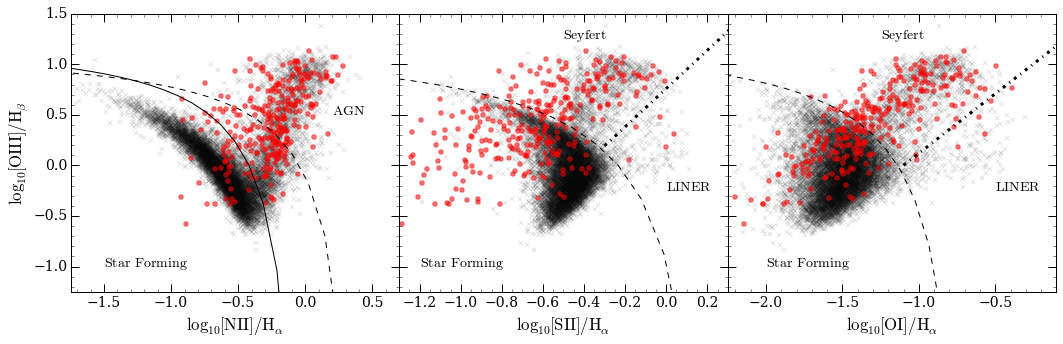

In [276]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')


P.figure(figsize=(15,5))
ax1=P.subplot(131)
ax1.scatter(N.log10(da['nii_6584_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha =0.1, marker='x', color='k')
ax1.scatter(N.log10(oh['nii_6584_flux']/oh['h_alpha_flux']), N.log10(oh['oiii_5007_flux']/oh['h_beta_flux']), alpha =0.5, marker='o', color='r')
ax1.plot(x, y, c='k', linestyle='solid')
ax1.plot(x1, y1, c='k', linestyle='dashed')
ax1.set_xlim(-1.75,0.7)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.5, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(0.45, 0.5, r'$\rm{AGN}$', ha='right')
ax1.set_ylabel(r'$\rm{log}_{10}[OIII]/H_{\beta}$')
ax1.set_xlabel(r'$\rm{log}_{10}[NII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax1=P.subplot(132)
ax1.scatter(N.log10((da['sii_6717_flux']+da['sii_6731_flux'])/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.scatter(N.log10((oh['sii_6717_flux']+oh['sii_6731_flux'])/oh['h_alpha_flux']), N.log10(oh['oiii_5007_flux']/oh['h_beta_flux']), alpha=0.5, marker='o', color='r')
ax1.plot(x2, y2, c='k', linestyle='dashed')
ax1.plot(sx1, sy1, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-1.3,0.3)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.2, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.set_xlabel(r'$\rm{log}_{10}[SII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('y', labelleft='off')
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax1.text(-0.5, 1.25, r'$\rm{Seyfert}$')
ax1.text(0.0, -0.25, r'$\rm{LINER}$')
ax1=P.subplot(133)
ax1.scatter(N.log10(da['oi_6300_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.scatter(N.log10(oh['oi_6300_flux']/oh['h_alpha_flux']), N.log10(oh['oiii_5007_flux']/oh['h_beta_flux']), alpha =0.5, marker='o', color='r')
ax1.plot(x3, y3, c='k', linestyle='dashed')
ax1.plot(sx2, sy2, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-2.25,-0.1)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-2.0, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(-1.25, 1.25, r'$\rm{Seyfert}$')
ax1.text(-0.5, -0.25, r'$\rm{LINER}$')
ax1.set_xlabel(r'$\rm{log}_{10}[OI]/H_{\alpha}$')
ax1.tick_params('y', labelleft='off')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.subplots_adjust(wspace=0.0)
P.savefig('GZ2_GALEX_sample_bpt_diagram_SNR_gtr_3_type_1_agn.png', facecolor='None', edgecolor='None')

In [3]:
b = Table.read('bpt_identified_type2_agn_hard_cuts_GZ2_GALEX_match_Halpha_EW.fits', format='fits')

In [4]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0 = 71.0, Om0 = 0.26)
d = cosmo.luminosity_distance(b['REDSHIFT']) * 3.08567758E16 * 1E6 * 100
print d

[  9.72705406e+26   1.69566083e+27   9.47592937e+26 ...,   4.84458222e+26
   1.68916805e+27   1.23097164e+27] Mpc


In [5]:
log_m_l = N.zeros(len(b))
m_msun = N.zeros_like(log_m_l)

for j in range(len(log_m_l)):
    if b['MU_MR'][j] <=2.1:
        log_m_l[j] = -0.95 + 0.56 * b["MU_MR"][j]
    else:
        log_m_l[j] = -0.16 + 0.18 * b["MU_MR"][j]
    m_msun[j] = (((4.62 - b["MR"][j])/2.5) + log_m_l[j])
    
low = b[N.where(m_msun < 10.25)]
med = b[N.where(N.logical_and(m_msun > 10.25, m_msun < 10.75))]
high = b[N.where(m_msun > 10.75)]

In [6]:
L = Column(name ='lum oiii', data = (1E-17)*b['oiii_5007_flux']*5007*4*N.pi*(d.value**2), unit=u.erg / u.s)
lowL = L[N.where(m_msun < 10.25)]
medL = L[N.where(N.logical_and(m_msun > 10.25, m_msun < 10.75))]
highL = L[N.where(m_msun > 10.75)]

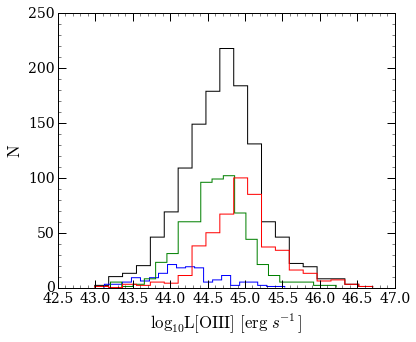

In [7]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')
P.figure(figsize=(6,5))
P.hist(N.log10(L), bins=20, histtype='step', color='k')
P.hist(N.log10(lowL), bins=20, histtype='step', color='b')
P.hist(N.log10(medL), bins=20, histtype='step', color='g')
P.hist(N.log10(highL), bins=20, histtype='step', color='r')
P.xlabel(r'$\rm{log}_{10}L[OIII]$ $[\rm{erg}$ $s^{-1}]$')
P.ylabel(r'$\rm{N}$')
P.minorticks_on()
P.tick_params('both', which='major', length=8, width=1)
P.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('l_oiii_luminosity_low_med_high_mass_bpt_type2_agn_hardcut.png', facecolor='None', edgecolor='None')

In [8]:
print 'all', N.mean(N.log10(L))
print 'low', N.mean(N.log10(lowL))
print 'med', N.mean(N.log10(medL))
print 'high', N.mean(N.log10(highL))

all 44.6934736282
low 44.1877002558
med 44.6111655218
high 44.9750960651


(array([  10.,   39.,   98.,  248.,  391.,  313.,  129.,   47.,   19.,    3.]),
 array([ 43.27798275,  43.59188256,  43.90578237,  44.21968218,
         44.53358199,  44.8474818 ,  45.16138161,  45.47528142,
         45.78918123,  46.10308104,  46.41698085]),
 <a list of 10 Patch objects>)

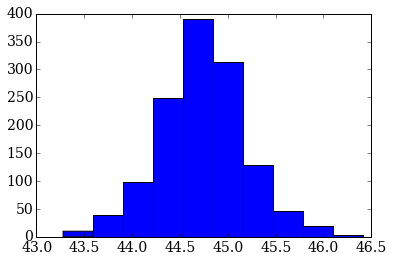

In [9]:
LHa = Column(name ='lum h alpha', data = (1E-17)*b['h_alpha_flux']*6562.8*4*N.pi*(d.value**2), unit=u.erg / u.s)
P.hist(N.log10(LHa))

In [10]:
msol = 1.989E30 # mass of sun in kg
lsol = 3.846E33 # luminosity of sun in erg/s
mpc = 3.08567758E16 * 1E6 # mpc in m
c = 299792.458 #speed of light in km/s

In [11]:
cent_depth = (b['h_alpha_flux'] - b['h_alpha_cont'])/b['h_alpha_cont']

In [12]:
#fwhm = (abs(b['h_alpha_eqw']/(cent_depth * (N.pi/(12**0.5)))))
#P.hist(abs(b['h_alpha_eqw']), range=(0,100))
fwhm = (abs(b['h_alpha_eqw'])/6562.8)*c

/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:790: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


In [13]:
mbh = 3E6 * (LHa/1E42)**(0.45) * (fwhm/1E3)**(2.06)

(array([   1.,   15.,   55.,  113.,  135.,  183.,  175.,  148.,  125.,
          93.,   74.,   61.,   33.,   21.,   22.,   12.,   10.,    6.,
           3.,    3.,    6.,    0.,    1.,    0.,    0.]),
 array([  6.5 ,   6.68,   6.86,   7.04,   7.22,   7.4 ,   7.58,   7.76,
          7.94,   8.12,   8.3 ,   8.48,   8.66,   8.84,   9.02,   9.2 ,
          9.38,   9.56,   9.74,   9.92,  10.1 ,  10.28,  10.46,  10.64,
         10.82,  11.  ]),
 <a list of 25 Patch objects>)

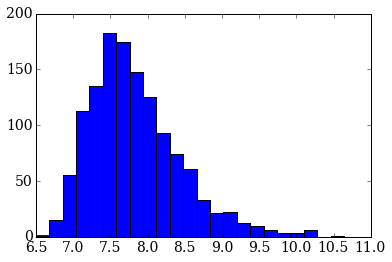

In [14]:
P.hist(N.log10(mbh), range=(6.5,11), bins=25)

In [15]:
lowmbh = mbh[N.where(m_msun < 10.25)]
medmbh = mbh[N.where(N.logical_and(m_msun > 10.25, m_msun < 10.75))]
highmbh = mbh[N.where(m_msun > 10.75)]

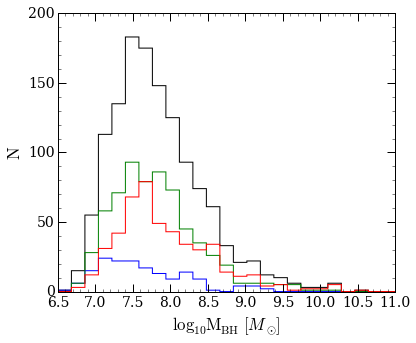

In [16]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')
P.figure(figsize=(6,5))
P.hist(N.log10(mbh), range=(6.5,11), bins=25, histtype='step', color='k')
P.hist(N.log10(lowmbh), range=(6.5,11), bins=25, histtype='step', color='b')
P.hist(N.log10(medmbh), range=(6.5,11), bins=25, histtype='step', color='g')
P.hist(N.log10(highmbh), range=(6.5,11), bins=25, histtype='step', color='r')
P.xlabel(r'$\rm{log}_{10}M_{BH}$ $[M_{\odot}]$')
P.ylabel(r'$\rm{N}$')
P.minorticks_on()
P.tick_params('both', which='major', length=8, width=1)
P.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('mbh_low_med_high_mass_type2_bpt_hardcut_agn.png', facecolor='None', edgecolor='None')


In [17]:
N.mean(N.log10(highmbh))

7.9342600418964331

In [18]:
p, cov = N.polyfit(N.log10(L/10**m_msun), b['NUV_U'], 1, cov=True)
print p, cov**0.5
x = N.linspace(31, 37, 20)
y = p[1]+p[0]*x
print x, y


[-0.15067348  6.66015906] [[ 0.03778247         nan]
 [        nan  1.28727736]]
[ 31.          31.31578947  31.63157895  31.94736842  32.26315789
  32.57894737  32.89473684  33.21052632  33.52631579  33.84210526
  34.15789474  34.47368421  34.78947368  35.10526316  35.42105263
  35.73684211  36.05263158  36.36842105  36.68421053  37.        ] [ 1.98928114  1.94170004  1.89411894  1.84653785  1.79895675  1.75137565
  1.70379455  1.65621345  1.60863235  1.56105125  1.51347015  1.46588905
  1.41830795  1.37072685  1.32314575  1.27556465  1.22798355  1.18040246
  1.13282136  1.08524026]


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from IPython.kernel.zmq import kernelapp as app


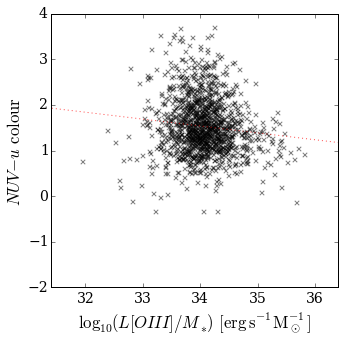

In [19]:
P.figure(figsize=(5,5))
P.scatter(N.log10(L/10**m_msun), b['NUV_U'], marker='x', color='k', alpha=0.5)
P.plot(x, p[1]+p[0]*x, c='r', alpha=0.7, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$NUV-u$ $\rm{colour}$')
P.ylim(-2,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_nuv_colour_type2.png', edgecolor='None', facecolor='None')

In [20]:
H, X, Y = N.histogram2d(N.log10(L/10**m_msun), b['NUV_U'], range=([31.4, 36.4],[-2,4]), bins=15)

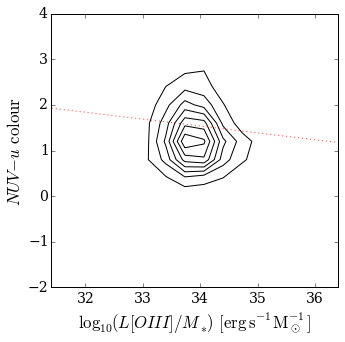

In [21]:
P.figure(figsize=(5,5))
P.contour(X[:-1], Y[:-1], H.T, orgin='lower', colors='k')
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$NUV-u$ $\rm{colour}$')
P.ylim(-2,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_colour_type2_nuv_contuor.png', edgecolor='None', facecolor='None')

In [22]:
p = N.polyfit(N.log10(L/10**m_msun), b['MU_MR'], 1)
print p
x = N.linspace(31, 37, 20)
y = p[1]+p[0]*x
print x, y

[ -0.28437201  11.65814702]
[ 31.          31.31578947  31.63157895  31.94736842  32.26315789
  32.57894737  32.89473684  33.21052632  33.52631579  33.84210526
  34.15789474  34.47368421  34.78947368  35.10526316  35.42105263
  35.73684211  36.05263158  36.36842105  36.68421053  37.        ] [ 2.84261459  2.7528129   2.66301122  2.57320953  2.48340784  2.39360615
  2.30380446  2.21400277  2.12420108  2.0343994   1.94459771  1.85479602
  1.76499433  1.67519264  1.58539095  1.49558926  1.40578758  1.31598589
  1.2261842   1.13638251]


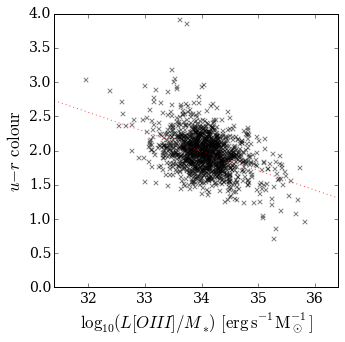

In [23]:
P.figure(figsize=(5,5))
P.scatter(N.log10(L/10**m_msun), b['MU_MR'], marker='x', color='k', alpha=0.5)
P.plot(x, y, c='r', alpha=0.7, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$u-r$ $\rm{colour}$')
P.ylim(0,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_colour_type2.png', edgecolor='None', facecolor='None')

In [24]:
H, X, Y = N.histogram2d(N.log10(L/10**m_msun), b['MU_MR'], range=([31.4, 36.4],[-2,4]), bins=15)

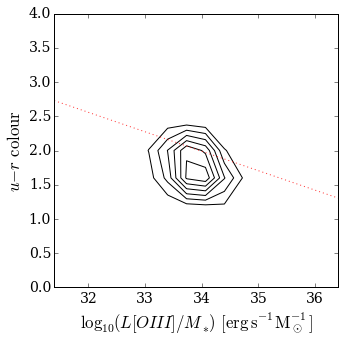

In [25]:
P.figure(figsize=(5,5))
P.contour(X[:-1], Y[:-1], H.T, orgin='lower', colors='k')
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$u-r$ $\rm{colour}$')
P.ylim(0,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_colour_type2_contuor.png', edgecolor='None', facecolor='None')

[  0.17955394  11.8056973 ]
[ 42.          42.26315789  42.52631579  42.78947368  43.05263158
  43.31578947  43.57894737  43.84210526  44.10526316  44.36842105
  44.63157895  44.89473684  45.15789474  45.42105263  45.68421053
  45.94736842  46.21052632  46.47368421  46.73684211  47.        ] [ 19.34696292  19.39421395  19.44146499  19.48871603  19.53596707
  19.58321811  19.63046914  19.67772018  19.72497122  19.77222226
  19.81947329  19.86672433  19.91397537  19.96122641  20.00847745
  20.05572848  20.10297952  20.15023056  20.1974816   20.24473263]


(42.5, 47)

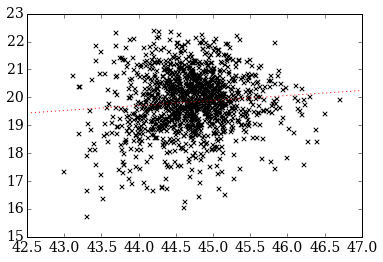

In [26]:
p = N.polyfit(N.log10(L), b['NUV'], 1)
print p
x = N.linspace(42, 47, 20)
y = p[1]+p[0]*x
print x, y


P.scatter(N.log10(L), b['NUV'], marker='x', c='k')
P.plot(x, y, c='r', linestyle='dotted')
P.xlim(42.5, 47)

In [57]:
print np.std(b['NUV_U'])
print np.std(b['MU_MR'])

0.624184577734
0.309523744322


In [58]:
ur_cont = 0.25*np.random.randn(len(b)) + 0.14
nuv_cont = 0.55*np.random.randn(len(b)) + 0.48

type1_ur = Column(name = 'cont u - r', data= b['MU_MR'] + ur_cont)
type1_nuvu = Column(name = 'cont NUV - u', data= b['NUV_U'] - nuv_cont)

1.45048904419
1.02842341254


(array([   7.,   20.,  126.,  304.,  374.,  229.,  131.,   69.,   23.,   14.]),
 array([-0.35274506,  0.04984741,  0.45243988,  0.85503235,  1.25762482,
         1.66021729,  2.06280975,  2.46540222,  2.86799469,  3.27058716,
         3.67317963]),
 <a list of 10 Patch objects>)

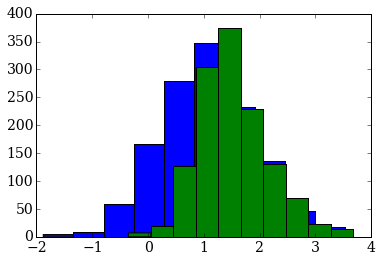

In [60]:
print np.median(b['NUV_U'])
print np.median(type1_nuvu)
P.hist(type1_nuvu)
P.hist(b['NUV_U'])

In [63]:
b.add_columns([type1_ur, type1_nuvu])

In [61]:
f = open('params.contaminatedtype2.txt', 'a')
for n in range(len(b)):
    f.write('python glamdring_run.py '+str(type1_ur[n])+' '+str(b['Err_MU_MR'][n])+' '+str(type1_nuvu[n])+' '+str(b['Err_NUV_U'][n])+' '+str(b['REDSHIFT'][n])+' '+str(b['t01_smooth_or_features_a02_features_or_disk_debiased'][n])+' '+str(b['t01_smooth_or_features_a01_smooth_debiased'][n])+' '+str('%18i' % b['dr8objid'][n])+' '+str(b['ra1_1'][n])+' '+str(b['dec1_1'][n])+'\n')

f.close()

In [64]:
b.write('bpt_identified_type2_agn_hard_cuts_GZ2_GALEX_match_Halpha_EW_contam_colours_avg_diff_type1.fits', format='fits')